#Part 1
f is the sum of two convex function x1^2 and x2^2+9 and thus it is convex and also f is greater than equal to 9 for all x1 and x2 thus the minimizer here is (0,0) and min value is 9.

and for g(x1,x2,...,xn) the min is achieved when x_{i} = i^2 and also it is the sum of convex functions and thus are convex.

In [1]:

import numpy as np
from numpy.linalg import norm

def my_function(x1,x2):
    return x1**2 + x2**2 + 9

def gradf(x1, x2):
    return -2*x1, -2*x2

# Initial point
x0 = np.array([1000, -1000])

def line_search( xk1, xk2, tau=10**(-15)):
    pk1, pk2 = gradf(xk1, xk2)
    step = 0.5
    iteration = 0
    while norm(np.array([pk1, pk2])) > tau:
        xk1, xk2 = xk1 + step * pk1, xk2 + step * pk2
        pk1, pk2 = gradf(xk1, xk2)
        iteration += 1
        print(pk1,pk2)
    return xk1, xk2 , f"The number of iteration is {iteration}"

final_point = line_search(x0[0],x0[1])

print(f"The minimum point is: {final_point}")


-0.0 -0.0
The minimum point is: (0.0, 0.0, 'The number of iteration is 1')


**Thus the minimum value will be f(0,0) = 9**

In [2]:
x0 = (1000, -1000)
tau = 10**(-15)
minimizerstore = []
minimumstore = []
iterationstore = []


from numpy import linalg as l2

def gradf(x,y):
  return np.array([2*x, 2*y])

def hessian(x,y):
  return np.array([[2,0],[0,2]])

xk = np.array([1000,-1000])

count = 0
xk[0] = x0[0]
xk[1] = x0[1]
while l2.norm(gradf(xk[0], xk[1])) > tau:
  xk = xk - np.linalg.inv(hessian(xk[0],xk[1]))@gradf(xk[0], xk[1])
  count += 1
minimizerstore.append(xk)
minimumstore.append([xk[0], xk[1]])
iterationstore.append(count)

In [3]:
minimumstore

[[0.0, 0.0]]

In [4]:
count

1

**The number of iterations came out to be 1, similar to that of line search and the minimizers and minimum function value came out to be the same as earlier**

In [5]:
minimizerstore

[array([0., 0.])]

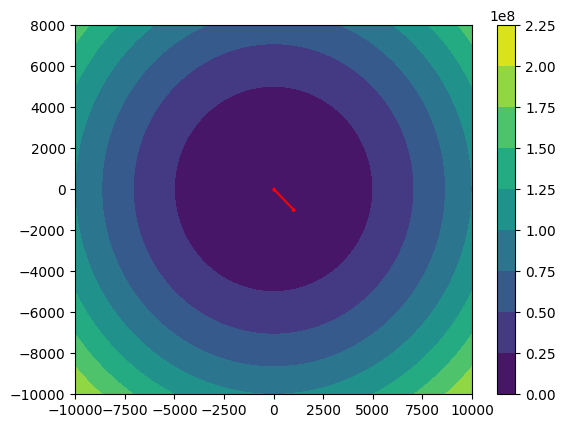

In [6]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
# Using the steepest descent
def function(x1,x2):
  return (x1)**2 + (x2)**2 + 9

x = np.linspace(-10000,10000,1000)
y = np.linspace(-10000,8000,1000)

X,Y = np.meshgrid(x,y)

Z = function(X,Y)
tau = 10**(-15)
pk1, pk2 = -gradf(x0[0], x0[1])
step = 0.5
xk1 = x0[0]
xk2 = x0[1]
xk1_list, xk2_list = [], []
xk1_list.append(xk1)
xk2_list.append(xk2)
while norm(np.array([pk1, pk2])) > tau:
    xk1, xk2 = xk1 + step * pk1, xk2 + step * pk2
    pk1, pk2 = gradf(xk1, xk2)
    xk1_list.append(xk1)
    xk2_list.append(xk2)
    plt.plot(xk1_list,xk2_list,markersize=2,color="red",marker="^")
p=plt.contourf(X,Y,Z)
cbar = plt.colorbar(p)

plt.show()

In [7]:
xk1_list,xk2_list

([1000, 0.0], [-1000, 0.0])

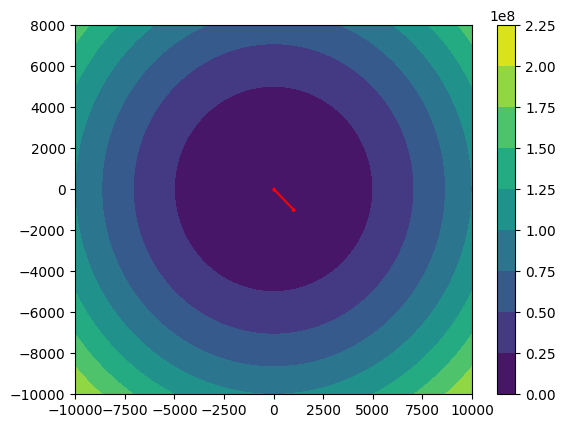

In [8]:
#Using Newton's method
xk1_list, xk2_list = [], []

xk=np.array([1000,-1000])
xk1_list.append(xk[0])
xk2_list.append(xk[1])
while l2.norm(gradf(xk[0], xk[1])) > tau:

  xk = xk - np.linalg.inv(hessian(xk[0],xk[1]))@gradf(xk[0], xk[1])
  xk1_list.append(xk[0])
  xk2_list.append(xk[0])
  plt.plot(xk1_list,xk2_list,markersize=2,color="red",marker="^")
p=plt.contourf(X,Y,Z)
cbar = plt.colorbar(p)

plt.show()

**Since due to one iteration there is only one point in the iteration line as shown in the level curve above**


In [9]:
import time
def periodic_function(y):
    value = [1/64,1/16,1/256,1/4]
    z = y%4
    return value[z]

def g(x):
    n = len(x)
    return sum((1 / periodic_function(i)) * (x[i - 1] - i**2)**2 for i in range(1, n + 1))

def gradient_g(x):
    n = len(x)
    return np.array([2 * (1 / periodic_function(i)) * (x[i - 1] - i**2) for i in range(1, n + 1)])

def hessian_g(x):
    n = len(x)
    return np.diag([2 / (periodic_function(i)**2) for i in range(1, n + 1)])

def gradient_descent_g(x0, tau=1e-15, max_iterations=10000):
    x = x0.copy()
    start_time = time.time()
    for iteration in range(max_iterations):
        gradient = gradient_g(x)
        step_size = tau
        x = x - step_size * gradient
        if np.linalg.norm(gradient) < tau:
            break
    end_time = time.time()
    return x, g(x), iteration + 1, end_time - start_time

In [10]:
def newton_method_g(x0, tau=1e-15, max_iterations=10000):
    x = x0.copy()
    start_time = time.time()
    for iteration in range(max_iterations):
        gradient = gradient_g(x)
        hessian = hessian_g(x)
        step_size = tau
        x = x - step_size * np.linalg.solve(hessian, gradient)
        if np.linalg.norm(gradient) < tau:
            break
    end_time = time.time()
    return x, g(x), iteration + 1, end_time - start_time


For n = 2:
Gradient Descent: Minimizer = [1.         2.00000001], Objective Value = 1023.9999895135261, Iterations = 10000, Time = 0.17801451683044434 seconds
Newton's Method: Minimizer = [1. 2.], Objective Value = 1024.0, Iterations = 10000, Time = 0.4015665054321289 seconds


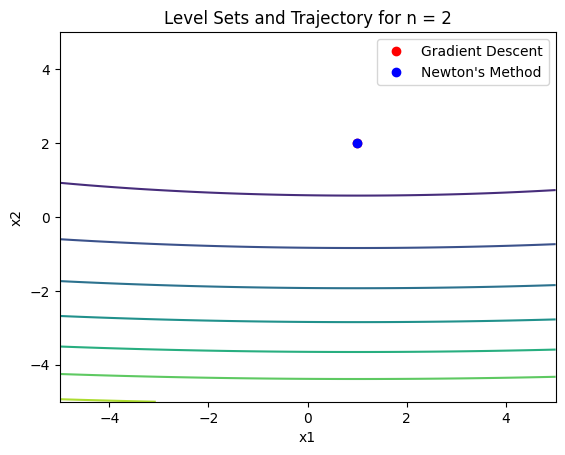


For n = 20:
Gradient Descent: Minimizer = [ 1.          2.00000001  3.          4.00000002  5.00000001  6.00000015
  7.          8.00000007  9.00000002 10.00000046 11.00000001 12.00000017
 13.00000005 14.00000093 15.00000002 16.00000031 17.00000009 18.00000157
 19.00000003 20.00000049], Objective Value = 51370959.60643979, Iterations = 10000, Time = 0.5784921646118164 seconds
Newton's Method: Minimizer = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.], Objective Value = 51370959.99998953, Iterations = 10000, Time = 1.9116482734680176 seconds

For n = 200:
Gradient Descent: Minimizer = [  1.           2.00000001   3.           4.00000002   5.00000001
   6.00000015   7.           8.00000007   9.00000002  10.00000046
  11.00000001  12.00000017  13.00000005  14.00000093  15.00000002
  16.00000031  17.00000009  18.00000157  19.00000003  20.00000049
  21.00000013  22.00000237  23.00000004  24.00000071  25.00000019
  26.00000333  27.00000006  28.00000097  2

KeyboardInterrupt: 

In [11]:

n_values = [2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000]

for n in n_values:
    x0 = np.arange(1, n + 1)

    # Gradient Descent
    minimizer_gd, value_gd, iterations_gd, time_gd = gradient_descent_g(x0)

    # Newton's Method
    minimizer_newton, value_newton, iterations_newton, time_newton = newton_method_g(x0)

    print(f"\nFor n = {n}:")
    print(f"Gradient Descent: Minimizer = {minimizer_gd}, Objective Value = {value_gd}, Iterations = {iterations_gd}, Time = {time_gd} seconds")
    print(f"Newton's Method: Minimizer = {minimizer_newton}, Objective Value = {value_newton}, Iterations = {iterations_newton}, Time = {time_newton} seconds")

    if n == 2:
        x_values = np.linspace(-1000, 1000, 1000)
        y_values = np.linspace(-1000, 1000, 1000)
        X, Y = np.meshgrid(x_values, y_values)
        Z = g(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

        plt.contour(X, Y, Z)
        plt.plot(minimizer_gd[0], minimizer_gd[1], 'ro', label='Gradient Descent')
        plt.plot(minimizer_newton[0], minimizer_newton[1], 'bo', label="Newton's Method")
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title('Level Sets and Trajectory for n = 2')
        plt.legend()
        plt.show()

#Part 4
For n = 2000 the google collab crash occured.

Changing the starting point in Part 2 (for f(x)) and Part 3 (for g(x)) can impact the number of iterations required for convergence.

In Part 2:
- For Gradient Descent, a suitable starting point might lead to faster convergence, reducing the number of iterations.
- For Newton's Method, the choice of starting point is crucial. A good starting point can result in a quicker convergence, while a poor choice might lead to slower convergence.

In Part 3:
- Similar considerations apply for both Gradient Descent and Newton's Method. The impact of the starting point on convergence depends on the curvature and geometry of the function being optimized.

Overall, the choice of the starting point is an important factor in optimization algorithms, and it can influence the efficiency of the optimization process.